In [1]:
import os
import sys
from pathlib import Path
django_project_dir = Path(".")
sys.path.insert(0, str(django_project_dir))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "newsilkroad.settings")
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
import django
django.setup()

[raven.contrib.django.client.DjangoClient]DEBUG 17:51:58 Configuring Raven for host: None
[raven.contrib.django.client.DjangoClient]INFO 17:51:58 Raven is not configured (logging is disabled). Please see the documentation for more information.


In [55]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from infrastructure.models import Project
from locations.models import GeometryStore
import ipdb
from django.db import connection

In [3]:
GeometryStore.objects.all().count()

10574

In [51]:
lines_shp = "shapefiles/lines/locations_lines.shp"
points_shp = "shapefiles/points/locations_points.shp"
poly_shp = "shapefiles/polys/locations_poly.shp"

In [48]:
def get_gp_dataframe(sql):
    df = geopandas.read_postgis(sql, connection)
    df['identifier'] = df['identifier'].apply(str)
    return df

In [49]:
sql_lines = """
select store.label AS label, store.identifier AS identifier, lines.geom AS geom 
FROM locations_geometrystore AS store, locations_linestringgeometry AS lines 
WHERE store.id = lines.id
"""

sql_points = """
select store.label AS label, store.identifier AS identifier, point.geom AS geom 
FROM locations_geometrystore AS store, locations_pointgeometry AS point 
WHERE store.id = point.id
"""

sql_poly = """
select store.label AS label, store.identifier AS identifier, poly.geom AS geom 
FROM locations_geometrystore AS store, locations_polygongeometry AS poly 
WHERE store.id = poly.id
"""
df_lines = get_gp_dataframe(sql_lines)
df_points = get_gp_dataframe(sql_points)
df_poly = get_gp_dataframe(sql_poly)

In [50]:
df_lines.to_file(lines_shp)
df_points.to_file(points_shp)
df_poly.to_file(poly_shp)

<AxesSubplot:>

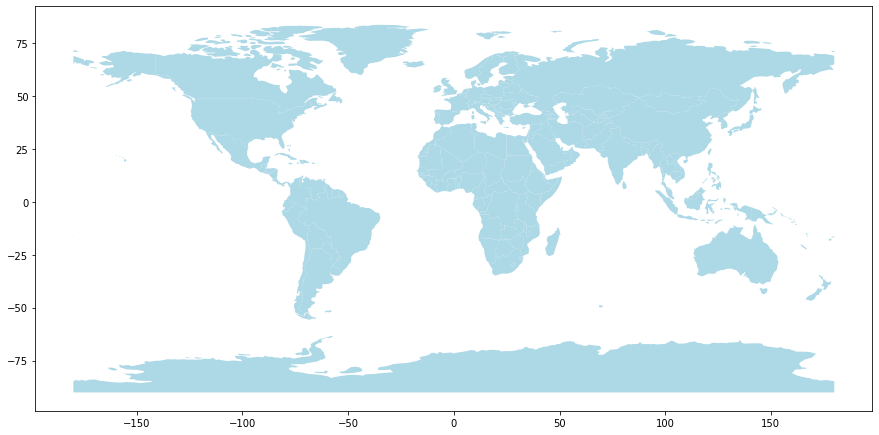

In [54]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(15,10), color='lightblue')

In [58]:
df_lines.plot(marker='*', color)

AttributeError: 'GeoDataFrame' object has no attribute 'set_aspect'